In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import pandas as pd
from tensorflow.keras.initializers import VarianceScaling
import matplotlib.pyplot as plt

# Task 1 & 2

In [ ]:
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz

!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz

!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz

!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

--2023-06-03 20:32:26--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.07s   

2023-06-03 20:32:27 (141 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-06-03 20:32:27--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[==========

In [ ]:
!gzip -d train-images-idx3-ubyte.gz
!gzip -d train-labels-idx1-ubyte.gz
!gzip -d t10k-images-idx3-ubyte.gz
!gzip -d t10k-labels-idx1-ubyte.gz

In [ ]:
!pip install idx2numpy
import idx2numpy
import time

trainImagesF = 'train-images-idx3-ubyte'
trainLabelsF = 'train-labels-idx1-ubyte'
testImagesF = 't10k-images-idx3-ubyte'
testLabelsF = 't10k-labels-idx1-ubyte'

trainImages = idx2numpy.convert_from_file(trainImagesF)
trainLabels = idx2numpy.convert_from_file(trainLabelsF)
testImages = idx2numpy.convert_from_file(testImagesF)
testLabels = idx2numpy.convert_from_file(testLabelsF)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7903 sha256=3f1329c577d8955838eaf06b111ab5377f6a3953e53ae2a5614a0215d978dd13
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy


In [ ]:
input = np.reshape(trainImages, (trainImages.shape[0], trainImages.shape[1] * trainImages.shape[2]))
test_input = np.reshape(testImages, (testImages.shape[0], testImages.shape[1] * testImages.shape[2]))
print("Reshaped Input: ", input.shape)
print("Test Reshaped: ", test_input.shape)

Reshaped Input:  (60000, 784)
Test Reshaped:  (10000, 784)


Network Width (k): 1, Dropout Rate (p): 1.0, Test Accuracy: 36.12%
Network Width (k): 5, Dropout Rate (p): 1.0, Test Accuracy: 89.50%
Network Width (k): 10, Dropout Rate (p): 1.0, Test Accuracy: 93.57%
Network Width (k): 20, Dropout Rate (p): 1.0, Test Accuracy: 94.45%
For Network Width (k): 40, Dropout Rate (p): 1.0, Training Accuracy: 100.00%
Network Width (k): 40, Dropout Rate (p): 1.0, Test Accuracy: 96.28%


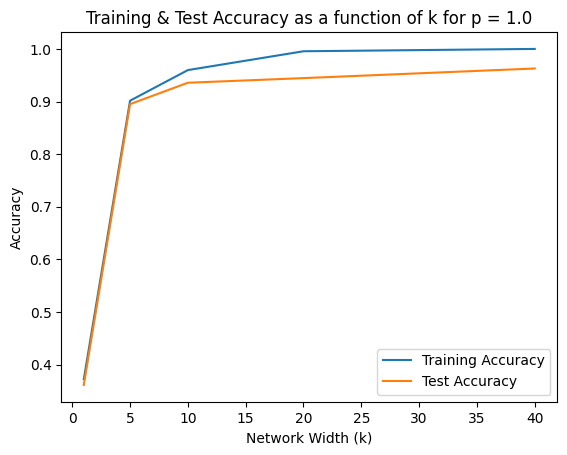

In [ ]:
batchSize = 64
numEpochs = 80
learningRate = 0.001
kValues = [1, 5, 10, 20, 40]
pValues = [1.0]

X_Train = np.concatenate(((input - np.mean(input, axis=0))/(np.std(input, axis=0) + 1e-9), np.ones((input.shape[0], 1))), axis = 1)
X_Test = np.concatenate(((test_input - np.mean(input, axis=0))/(np.std(input, axis=0) + 1e-9), np.ones((test_input.shape[0], 1))), axis = 1)
#print(pd.DataFrame(X_Train).describe())
y_train = tf.keras.utils.to_categorical(trainLabels, num_classes=10)
y_test = tf.keras.utils.to_categorical(testLabels, num_classes=10)

trainAccuracies = []
testAccuracies = []

for p in pValues:
    for k in kValues:
        model = Sequential()
        model.add(Dense(k, activation='relu', input_shape=(785,), kernel_initializer=VarianceScaling(mode='fan_in')))
        model.add(Dropout(1.0 - p))
        model.add(Dense(10, activation='softmax'))

        model.compile(optimizer=Adam(learning_rate=learningRate),
                      loss='categorical_crossentropy',
                      metrics=tf.keras.metrics.CategoricalAccuracy())

        history = model.fit(X_Train, y_train, batch_size=batchSize, epochs=numEpochs, verbose=0, validation_split=0.1)

        #print(history.history.keys())

        trainAccuracy = max(history.history['categorical_accuracy'])
        _, testAccuracy = model.evaluate(X_Test, y_test, verbose=0)

        trainAccuracies.append(trainAccuracy)
        testAccuracies.append(testAccuracy)

        if round(trainAccuracy, 3) == 1.0:
            print(f"For Network Width (k): {k}, Dropout Rate (p): {p}, Training Accuracy: {trainAccuracy * 100:.2f}%")
        print(f"Network Width (k): {k}, Dropout Rate (p): {p}, Test Accuracy: {testAccuracy * 100:.2f}%")

# Plot the training accuracy as a function of k for different p values
plt.plot(kValues, trainAccuracies, label="Training Accuracy")
plt.plot(kValues, testAccuracies, label="Test Accuracy")
plt.xlabel('Network Width (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Test Accuracy as a function of k for p = 1.0')
plt.show()

# Smaller the p, longer the amount of optimization time required for training convergence. Harder to optimize for smaller p. Without noise, best test accuracy is 96.75% for the pair (k, p) = (40, 1.0)

Network Width (k): 1, Dropout Rate (p): 0.1, Test Accuracy: 11.50%
Network Width (k): 5, Dropout Rate (p): 0.1, Test Accuracy: 69.57%
Network Width (k): 10, Dropout Rate (p): 0.1, Test Accuracy: 77.72%
Network Width (k): 20, Dropout Rate (p): 0.1, Test Accuracy: 87.89%
Network Width (k): 40, Dropout Rate (p): 0.1, Test Accuracy: 90.59%

Network Width (k): 1, Dropout Rate (p): 0.5, Test Accuracy: 27.40%
Network Width (k): 5, Dropout Rate (p): 0.5, Test Accuracy: 83.86%
Network Width (k): 10, Dropout Rate (p): 0.5, Test Accuracy: 90.55%
Network Width (k): 20, Dropout Rate (p): 0.5, Test Accuracy: 93.29%
Network Width (k): 40, Dropout Rate (p): 0.5, Test Accuracy: 95.64%

Network Width (k): 1, Dropout Rate (p): 1.0, Test Accuracy: 40.64%
Network Width (k): 5, Dropout Rate (p): 1.0, Test Accuracy: 89.75%
Network Width (k): 10, Dropout Rate (p): 1.0, Test Accuracy: 93.41%
Network Width (k): 20, Dropout Rate (p): 1.0, Test Accuracy: 94.75%
For Network Width (k): 40, Dropout Rate (p): 1.0, Tr

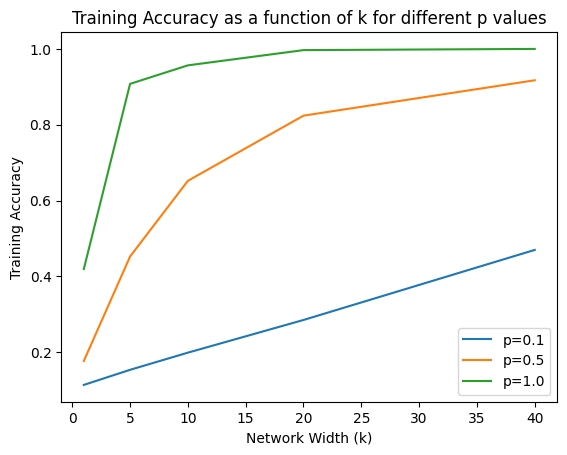

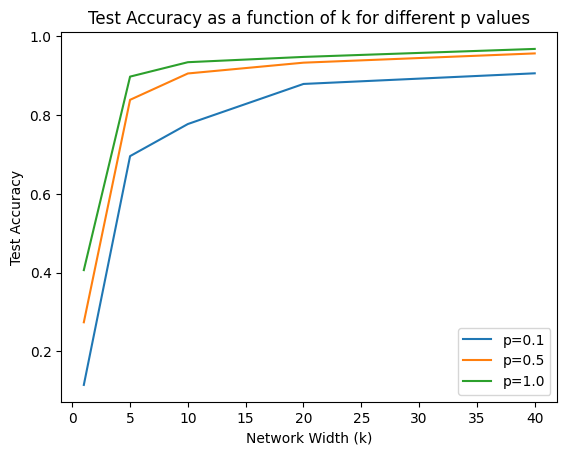

In [ ]:
batchSize = 64
numEpochs = 80
learningRate = 0.001
kValues = [1, 5, 10, 20, 40]
pValues = [0.1, 0.5, 1.0]

X_Train = np.concatenate(((input - np.mean(input, axis=0))/(np.std(input, axis=0) + 1e-9), np.ones((input.shape[0], 1))), axis = 1)
X_Test = np.concatenate(((test_input - np.mean(input, axis=0))/(np.std(input, axis=0) + 1e-9), np.ones((test_input.shape[0], 1))), axis = 1)
#print(pd.DataFrame(X_Train).describe())
y_train = tf.keras.utils.to_categorical(trainLabels, num_classes=10)
y_test = tf.keras.utils.to_categorical(testLabels, num_classes=10)

trainAcc_p, testAcc_p = [], []

for p in pValues:
  trainAccuracies = []
  testAccuracies = []
  for k in kValues:
        model = Sequential()
        model.add(Dense(k, activation='relu', input_shape=(785,), kernel_initializer=VarianceScaling(mode='fan_in')))
        model.add(Dropout(1.0 - p))
        model.add(Dense(10, activation='softmax'))

        model.compile(optimizer=Adam(learning_rate=learningRate),
                      loss='categorical_crossentropy',
                      metrics=tf.keras.metrics.CategoricalAccuracy())

        history = model.fit(X_Train, y_train, batch_size=batchSize, epochs=numEpochs, verbose=0, validation_split=0.1)

        #print(history.history.keys())

        trainAccuracy = max(history.history['categorical_accuracy'])
        _, testAccuracy = model.evaluate(X_Test, y_test, verbose=0)

        trainAccuracies.append(trainAccuracy)
        testAccuracies.append(testAccuracy)

        if round(trainAccuracy, 3) == 1.0:
            print(f"For Network Width (k): {k}, Dropout Rate (p): {p}, Training Accuracy: {trainAccuracy * 100:.2f}%")
        print(f"Network Width (k): {k}, Dropout Rate (p): {p}, Test Accuracy: {testAccuracy * 100:.2f}%")

  trainAcc_p.append(trainAccuracies)
  testAcc_p.append(testAccuracies)
  print()

# Plot the training accuracy as a function of k for different p values
for i, p in enumerate(pValues):
    plt.plot(kValues, trainAcc_p[i], label=f"p={p}")

plt.xlabel('Network Width (k)')
plt.ylabel('Training Accuracy')
plt.legend()
plt.title('Training Accuracy as a function of k for different p values')
plt.show()

for i, p in enumerate(pValues):
    plt.plot(kValues, testAcc_p[i], label=f"p={p}")

plt.xlabel('Network Width (k)')
plt.ylabel('Test Accuracy')
plt.legend()
plt.title('Test Accuracy as a function of k for different p values')
plt.show()

# Here comes the noise. Task 3
# With noise, the best test accuracy is 91.96% for the pair (k, p) = (40, 0.5)

Network Width (k): 1, Dropout Rate (p): 0.1, Test Accuracy: 11.47%
Network Width (k): 5, Dropout Rate (p): 0.1, Test Accuracy: 50.59%
Network Width (k): 10, Dropout Rate (p): 0.1, Test Accuracy: 71.63%
Network Width (k): 20, Dropout Rate (p): 0.1, Test Accuracy: 85.82%
Network Width (k): 40, Dropout Rate (p): 0.1, Test Accuracy: 88.41%
Network Width (k): 1, Dropout Rate (p): 0.5, Test Accuracy: 21.23%
Network Width (k): 5, Dropout Rate (p): 0.5, Test Accuracy: 81.17%
Network Width (k): 10, Dropout Rate (p): 0.5, Test Accuracy: 88.30%
Network Width (k): 20, Dropout Rate (p): 0.5, Test Accuracy: 90.79%
Network Width (k): 40, Dropout Rate (p): 0.5, Test Accuracy: 91.96%
Network Width (k): 1, Dropout Rate (p): 1.0, Test Accuracy: 29.39%
Network Width (k): 5, Dropout Rate (p): 1.0, Test Accuracy: 84.84%
Network Width (k): 10, Dropout Rate (p): 1.0, Test Accuracy: 89.83%
Network Width (k): 20, Dropout Rate (p): 1.0, Test Accuracy: 89.77%
Network Width (k): 40, Dropout Rate (p): 1.0, Test Acc

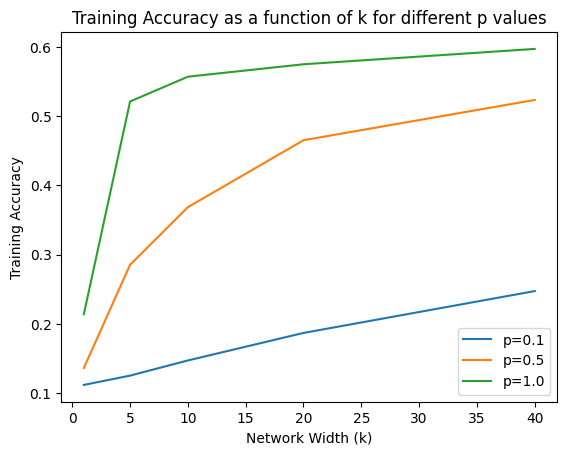

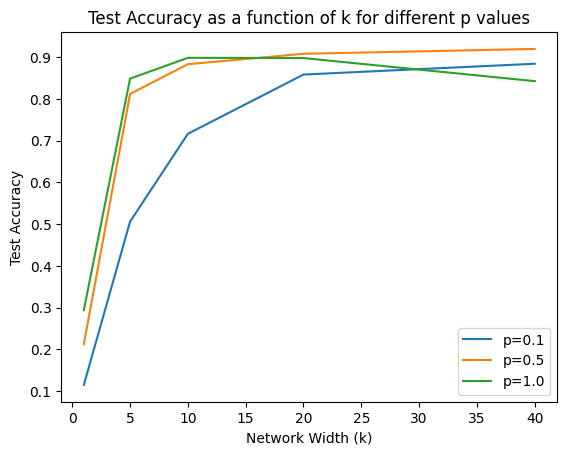

In [ ]:
batchSize = 64
numEpochs = 80
learningRate = 0.001
kValues = [1, 5, 10, 20, 40]
pValues = [0.1, 0.5, 1.0]

X_Train = np.concatenate(((input - np.mean(input, axis=0))/(np.std(input, axis=0) + 1e-9), np.ones((input.shape[0], 1))), axis = 1)
X_Test = np.concatenate(((test_input - np.mean(input, axis=0))/(np.std(input, axis=0) + 1e-9), np.ones((test_input.shape[0], 1))), axis = 1)

y_train = trainLabels.copy()

numExamples = input.shape[0]
numNoisyExamples = int(0.4 * numExamples)  # 40% of training examples
noisyIndices = np.random.choice(numExamples, numNoisyExamples, replace=False)

# Generate new labels for the noisy examples
newLabels = np.random.randint(low=0, high=10, size=numNoisyExamples)
originalLabels = trainLabels[noisyIndices]

for i in range(numNoisyExamples):
    while newLabels[i] == originalLabels[i]:
        newLabels[i] = np.random.randint(low=0, high=10)

# Assign the new labels to the noisy examples
y_train[noisyIndices] = newLabels

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(testLabels, num_classes=10)

trainAcc_p, testAcc_p = [], []

for p in pValues:
  trainAccuracies = []
  testAccuracies = []
  for k in kValues:
        model = Sequential()
        model.add(Dense(k, activation='relu', input_shape=(785,), kernel_initializer=VarianceScaling(mode='fan_in')))
        model.add(Dropout(1.0 - p))
        model.add(Dense(10, activation='softmax'))

        model.compile(optimizer=Adam(learning_rate=learningRate),
                      loss='categorical_crossentropy',
                      metrics=tf.keras.metrics.CategoricalAccuracy())

        history = model.fit(X_Train, y_train, batch_size=batchSize, epochs=numEpochs, verbose=0, validation_split=0.1)

        #print(history.history.keys())

        trainAccuracy = max(history.history['categorical_accuracy'])
        _, testAccuracy = model.evaluate(X_Test, y_test, verbose=0)

        trainAccuracies.append(trainAccuracy)
        testAccuracies.append(testAccuracy)

        if round(trainAccuracy, 3) == 1.0:
            print(f"For Network Width (k): {k}, Dropout Rate (p): {p}, Training Accuracy: {trainAccuracy * 100:.2f}%")
        print(f"Network Width (k): {k}, Dropout Rate (p): {p}, Test Accuracy: {testAccuracy * 100:.2f}%")

  trainAcc_p.append(trainAccuracies)
  testAcc_p.append(testAccuracies)

# Plot the training accuracy as a function of k for different p values
for i, p in enumerate(pValues):
    plt.plot(kValues, trainAcc_p[i], label=f"p={p}")

plt.xlabel('Network Width (k)')
plt.ylabel('Training Accuracy')
plt.legend()
plt.title('Training Accuracy as a function of k for different p values')
plt.show()

for i, p in enumerate(pValues):
    plt.plot(kValues, testAcc_p[i], label=f"p={p}")

plt.xlabel('Network Width (k)')
plt.ylabel('Test Accuracy')
plt.legend()
plt.title('Test Accuracy as a function of k for different p values')
plt.show()